# <img src="https://img.icons8.com/bubbles/50/000000/microscope.png" style="height:50px;display:inline">BM 335002 - E11: Classic Methods of Undersampled MRI Reconstruction 
## Experiment Report: SENSitivity Encoding - SENSE 
---

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Student Information
---
* Fill in



| #       |              Name |             Id |             email |
|---------|-------------------|----------------|------------------ |
|Student 1|  [your name here] | [your id here] | [your email here] |
|Student 2|  [your name here] | [your id here] | [your email here] |




### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* **No handwritten submissions.** 

* What you have to submit:
    * You should submit this file only, with the name: `id.ipynb`.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* When writing code, please follow PEP 8.

### <img src="https://img.icons8.com/bubbles/50/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next cell: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

In [3]:
# imports you will need
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Experiment Description
---
In this experiment, you will implement the reconstruction algorithm for undersampled MRI "SENSitivity Encoding (SENSE)". 
<br>
You will complete the following steps:
1. Load multi-coil k-space data

2. Create helper functions 

3. Create sensitivity maps

4. Implement a SENSE algorithm

5. Assess the reconstruction performance using PSNR and SSIM metrics
<br>




### <img src="https://img.icons8.com/bubbles/50/000000/google-docs.png" style="height:50px;display:inline"> Introduction  
---

#### Parallel imaging 

Parallel imaging works by acquiring a reduced amount of k-space data with an array of receiver coils. Instead of using a large homogeneous volume receiver coil, the data are acquired using an array of independent receiver channels. Each receiver coil is more sensitive to the specific volume of tissue nearest to the coil, which means that the coils provide an additional source of spatial information for image reconstruction. 
<center> <img src='https://drive.google.com/uc?export=view&id=1lXWYVU6zoAVW92kUHK-zhFQPgddHbjQO' width="300" > </center>



#### SENSE Algorithm

SENSE is a parallel imaging technique that unfolds the superimposed pixels in the image domain. It uses prior knowledge of the coil sensitivity profiles to recover the
full FOV image from the aliased image.<br>
Given a dataset of images with a size of  $N_{y} \times N_{x}$ from $N_{c}$  coils, the coil images can be modeled as:
\begin{equation}
c = Sm \tag{1}
\end{equation}

where $c$ is the coil images, $S$ is the coil sensitivity matrix, and $m$ is the full FOV image.<br>

### <img src="https://img.icons8.com/bubbles/50/000000/source-code.png" style="height:50px;display:inline"> 1. Load Data
---

**10 points**

In this experiment we'll use [fastMRI](https://fastmri.org/dataset/) dataset that includes single-coil and multi-coil fully sampled k-space data. <br>
We'll work with multi-coil raw data (k-space) of brain scans, which comes as a single 4D complex array.<br>
Load the file 'raw_data.npy' and get the shape of the data. <br>
Notice that the dimensions of the dataset are $(N_{z}, N_{c}, N_{y}, N_{x})$.<br>
$N_{z}$ corresponds to the number of slices, $N_{c}$ corresponds to the number of coils (channels), and $(N_{y}, N_{x})$ corresponds to the image matrix size (height, width). 

In [4]:
# ====== YOUR CODE: ======
path = r"C:\Users\perez\Desktop\masters\mri_research\code\python\mrf-masters\raw_data_2_mri.npy"
raw = np.load(path)
[Nz,Nc,Ny,Nx] = np.shape(raw)
print("Ny =", Ny,"\nNx =",Nx,"\nNz =",Nz,"\nNc =",Nc)
# ========================

Ny = 320 
Nx = 320 
Nz = 2 
Nc = 16


#####  A) What are the number of coils, the number of slices, and the size of the image matrix?

**Answer:** 

Number of coils: 16 <br>
Number of slices: 2 <br>
Image shape: 320x320

### <img src="https://img.icons8.com/bubbles/50/000000/source-code.png" style="height:50px;display:inline">  2. Create Helper Functions 
---

**20 points**

Complete the two helper functions: ``show_grid`` and ``ifft2``. <br>
We will use these functions later for displaying the images and apply IFFT on the raw data (as SENSE works in the image domain).

In [5]:
def show_grid (img: np.ndarray, cmap: str, title: str):
    """
    Plot all the coil channels images in a grid 
    
    :param img: Set of images, shape (Nc,Ny,Nx)
    :param cmap: Which colormap to use 
    :param title: The title of the figure (main title) 
    
    """
    # Use plt.subplot2grid to create a grid of images  
    # ====== YOUR CODE: ======
    Nc = img.shape[0]
    num = int(Nc/4)
    plt.figure(figsize=(10, 10))
    i = 0
    for col in np.arange(num):
        for row in np.arange(num):
            temp_img = img[i, :, :]
            plt.subplot2grid(shape=(num, num), loc=(row, col))
            plt.imshow(temp_img, cmap=cmap)
            plt.axis('off')
            i += 1
    plt.suptitle(title, size=16)
    plt.show()
    # ========================

In [6]:
def ifft2(raw: np.ndarray):
    """
    Apply inverse FFT on the raw k-space. 
    
    :param raw: Raw data (k-space)  
    :return img: Image domain 
    """
    # Use 1D np.fft functions, first apply 1D ifft on the rows and then on the columns.
    # Don't forget to shift the zero-frequency component to the center of the spectrum.
    
    # ====== YOUR CODE: ======
#     img = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(raw, -2), axis=-2), -2)
#     img = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(img, -1), axis=-1), -1)
    ## or fft2
    img = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(raw),axes=(-2,-1)))
    # ========================
    return img

#### <img src="https://img.icons8.com/bubbles/50/000000/source-code.png" style="height:50px;display:inline">  3. Coil Sensitivity Maps 
---


**15 points**

1. First, let's look at the given data.<br>
Convert the raw data to the image domain using the function `ifft2`, choose one slice and display it using the function `show_grid`. <br>
Use a gray colormap, for more information about 'cmap' look [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).<br>
Notice: From now on, we will use only the selected slice, i.e., we will work with a tensor of shape $(N_{c}, N_{y}, N_{x})$

(16, 320, 320)


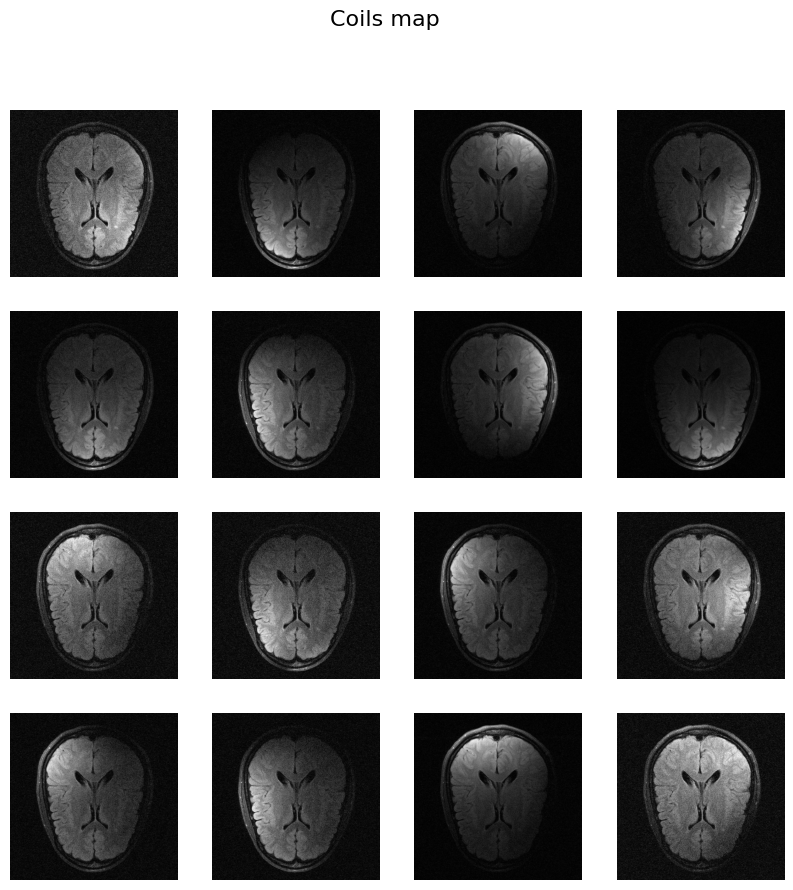

In [7]:
# ====== YOUR CODE: ======
img = ifft2(raw)
num_slice = 0
img_slice = img [num_slice]
print(img_slice.shape)
show_grid ( np.abs(img_slice), cmap='gray', title='Coils map')
# ========================

2. Next, combine the images from each coil into a single image using:
    - Averaging
    - gmean
   
   <br>
    
   Avoid explicit loops. <br>
   Display in one figure the combined images and add titles. 

C:\Users\perez\Desktop\masters\mri_research\code\python\mrf-masters\.venv\Lib\site-packages\scipy\_lib\array_api_compat\numpy\_aliases.py:116: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.array(obj, copy=copy, dtype=dtype, **kwargs)


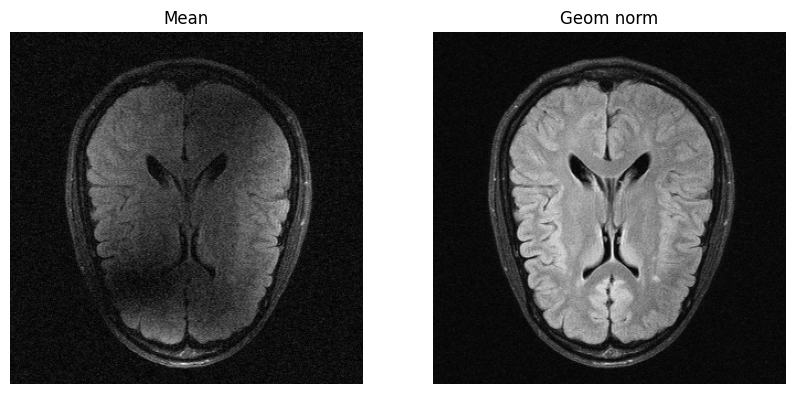

In [8]:
# ====== YOUR CODE: ======
from scipy.stats import gmean
img_combined_avg = np.mean(img_slice, 0)
img_combined_geom = gmean(img_slice, 0)
# Plot images 
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(np.abs(img_combined_avg), cmap='gray'), plt.title('Mean'), plt.axis('off')
plt.subplot(122), plt.imshow(np.abs(img_combined_geom), cmap='gray'), plt.title('Geom norm'), plt.axis('off')
plt.show()
# ========================

---
Sensitivity-based reconstruction (like SENSE) requires a highly accurate sensitivity assessment.<br>
Various methods for determining coil sensitivity maps have been developed to enable intensity correction of images acquired with a single surface coil or a coil array.<br>
Since sensitivity map estimation is a researched field that we will not focus on, we will use a basic method for estimation.<br>

We will assess the sensitivity matrix of the coils, S, according to the following steps: 
1. $S_{0}$: Dividing each coil image with the combined image (elememt-wise)
2. $S_{1}$: Smoothing the result ($S_{0}$) with a mean filter
3. $S_{2}$: Applying a threshold to retain only the well-defined regions
    <br>

  Overall the above steps can be wirtten as:
\begin{equation}
S = \frac{1}{I_{c}}c * K  \tag{2}
\end{equation}
<br>
  Where $I_{c} \in \mathbb{C} ^{N_{y} \times N_{x}} $ denotes the combined image; $ c \in \mathbb{C}^{N_{c} \times N_{y} \times N_{x}}$ denotes the coils images; $K \in \mathbb{R} ^{3 \times 3} $ denotes the mean filter - kernel matrix of  with a size of (3,3): 
$\Large \frac{1}{9} \small
\begin{pmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{pmatrix}$



3. Complete the function `sensitivity_map` according to the above steps.<br>
Assess the sensitivity matrix S for each of the combined images (averaging and rss) and display a grid of the sensitivity map using the function `show_grid` (this time use colormap 'jet'). 

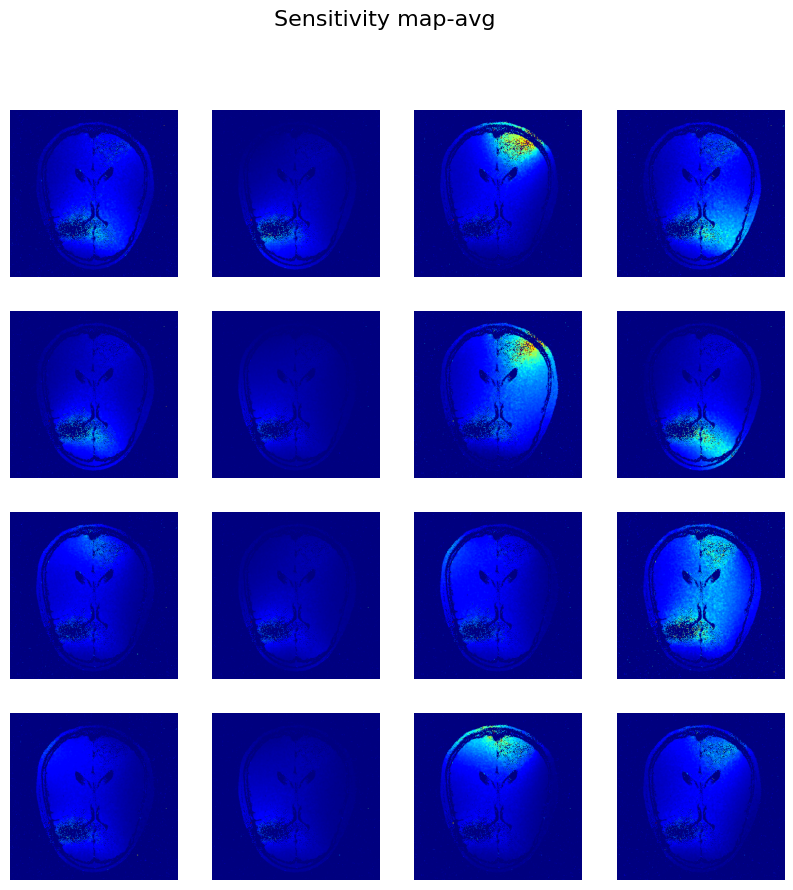

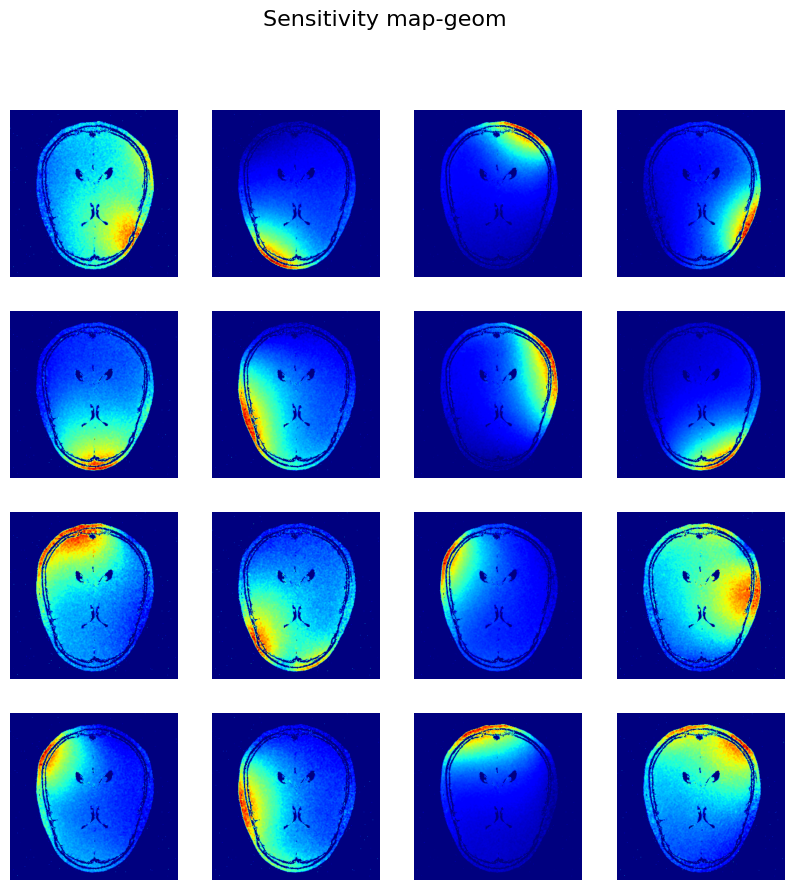

In [9]:
def sensitivity_map (img: np.ndarray, img_combined: np.ndarray):
    '''
    Create sensitivity map of the coils    
    
    :params img: Multi-coil images (Nc,Ny,Nx)
    :params img_combined: The combined images of all the coils (Ny,Nx)
    :params thresh: Threshold  
    :return S_2: The sensitivity map of the coils (Nc,Ny,Nx)
    
    '''
    # Use the function signal.convolve2d for applying a mean filter on the image
    # ====== YOUR CODE: ======
    Nc = img.shape[0]
    S_0 = img/(img_combined)

    # Smooth map
    kernel = np.ones((3,3))/9
    S_1 = np.zeros(img.shape, dtype=complex)
    for coil in np.arange(Nc):
        S_1[coil, :, :] = signal.convolve2d(S_0[coil, :, :], kernel, mode='same')
 
    # Mask the sensitivities to retain only the well-defined regions
    thresh = 0.12*np.max(np.abs(img_combined))
    mask = np.abs(img_combined) > thresh
    S_2 = S_1 * mask


    # ========================
    return S_2



# Get sensitivity maps
# Choose a reasonable value of the threshold for each combined image
# that distinguishes the brain from the background and define a brain mask
# ====== YOUR CODE: ======

S_2_avg = sensitivity_map (img_slice, img_combined_avg)
show_grid ( np.abs(S_2_avg), cmap='jet', title='Sensitivity map-avg')



S_2_geom = sensitivity_map (img_slice, img_combined_geom)
show_grid ( np.abs(S_2_geom), cmap='jet', title='Sensitivity map-geom')

# ========================




### <img src="https://img.icons8.com/bubbles/50/000000/source-code.png" style="height:50px;display:inline"> 4. Implement SENSE Algorithm
---

**50 points**

The undersampled imaging problem can be modeled as:
\begin{equation}
k = \Phi FSm \tag{3}
\end{equation}
Where $k$ is the undersampled image, $\Phi$ is a diagonal matrix with 1s or 0s, and $F$ is DFT.
<br>

Notice that for a fully sampled image, equation (3) is consistent with equation (1).<br> In this case, $\Phi$ is the identity matrix, and based on the linearity of the DFT we get : $ k = \Phi FSm = F\Phi Sm = Fc \rightarrow  c=F^{-1}k=Sm$ 
<br>


1. To demonstrate undersampled k-space, complete the function `subsample` with acceleration rate R, that samples the image each R row. You can use the function you implemented in the preparatory report.

In [10]:
def subsample(raw : np.ndarray, R: int):
    """
    Sample the k-space with a uniform cartesian pattern; each R row.
    
    :param raw: The k-space we want to sample, shape (Nc,Ny,Nx)
    :param R: Acceleration factor, sample each R row
    :return sampled_kspace: The sampled k-space
    """
    # ====== YOUR CODE: ======
    mask = np.zeros(raw.shape)
    mask[:,::R,:] = 1
    sampled_kspace = raw * mask
    # ========================
    return sampled_kspace

To find the full FOV image $m$, we can extract $m$ from equation (3) in the least square sense:
$$
\hat{m}=\underbrace{((\Phi FS)^H(\Phi FS))^{-1}(\Phi FS)}_{\text{Pseudo-inverse}}k \tag{4}
$$
<br>
If $Nc\geq R$, we can solve $\dfrac{NyNx}{R}$ subproblems independently.
<br>
For example, for $R=2$ and $N_{c}=4$ each subproblem can be modeled as:<br><br> 
$
\begin{bmatrix}
    c_{y,x}^1 \\
    c_{y,x}^2 \\
    c_{y,x}^3 \\ 
    c_{y,x}^4 \\ 
\end{bmatrix}
= 
\begin{bmatrix}
    S_{y,x}^1 & S_{y+Ny/2,x}^1\\
    S_{y,x}^2 & S_{y+Ny/2,x}^2\\
    S_{y,x}^3 & S_{y+Ny/2,x}^3\\ 
    S_{y,x}^4 & S_{y+Ny/2,x}^4    
\end{bmatrix} 
\begin{bmatrix}
    m_{y,x}\\
    m_{y+Ny/2,x}    
\end{bmatrix}
$
<br>
<center> <img src='https://drive.google.com/uc?export=view&id=11WrhmMG7cqnP1a_-UpAtPzVtLNnDbhGT' width="600" > </center>


2. Complete the function `SENSE` that reconstructs the undersampled image according to the explained above.

In [11]:
def SENSE(undersampled_img: np.ndarray, S_mat: np.ndarray, R: int):
    '''
    Reconstructs the undersampled image.
    
    :params undersampled_img: The undersampled image to reconstruct (Nc,Ny,Nx)
    :params S_mat: The sensitivity matrix of the coils (Nc,Ny,Nx)
    :params R: Acceleration factor, sample each R row
    :return recon_SENSE: The reconstructed image
    '''
    # Iterate over the pixels of the image, and reconstruct the pixels' values in 
    # the least-squares sense, according to equation (4).
    # Use the fucntion np.linalg.pinv for psaudo inverse 
    # ====== YOUR CODE: ======
    _, Ny, Nx, = undersampled_img.shape
    recon_SENSE = np.zeros((Ny, Nx), dtype=np.complex128)
    for y in np.arange(0, int(Ny/R)):
        y_samp = np.arange(y, Ny, Ny/R, dtype='int')
        for x in np.arange(0, Nx):
            S_R = S_mat[:,y_samp, x]
            recon_SENSE[y_samp, x] = np.matmul(np.linalg.pinv(S_R), undersampled_img[:,y, x])
    # ========================
    return recon_SENSE


Let's look at the results.<br>
3. Subsample the raw data with accelerating rate 2 using the function `subsample` and reconstruct the undersampled image using the function `SENSE`. Reconstruct using the two different sensitivity maps you generated. <br>

Display 2 figures:
1. The undersampled images of the coils (use the function `show_grid`)

2. The two reconstructed images<br>

Add titles to the figures. 

In [15]:
# ====== YOUR CODE: ======
R = 2
raw_sampled_R2 = subsample(raw[num_slice,...],R)
img_R2 = ifft2(raw_sampled_R2)
print("here")
recon_SENSE_avg_2 = SENSE(img_R2, S_2_avg, R)
recon_SENSE_geom_2 = SENSE(img_R2, S_2_geom, R)
# ========================

here


KeyboardInterrupt: 

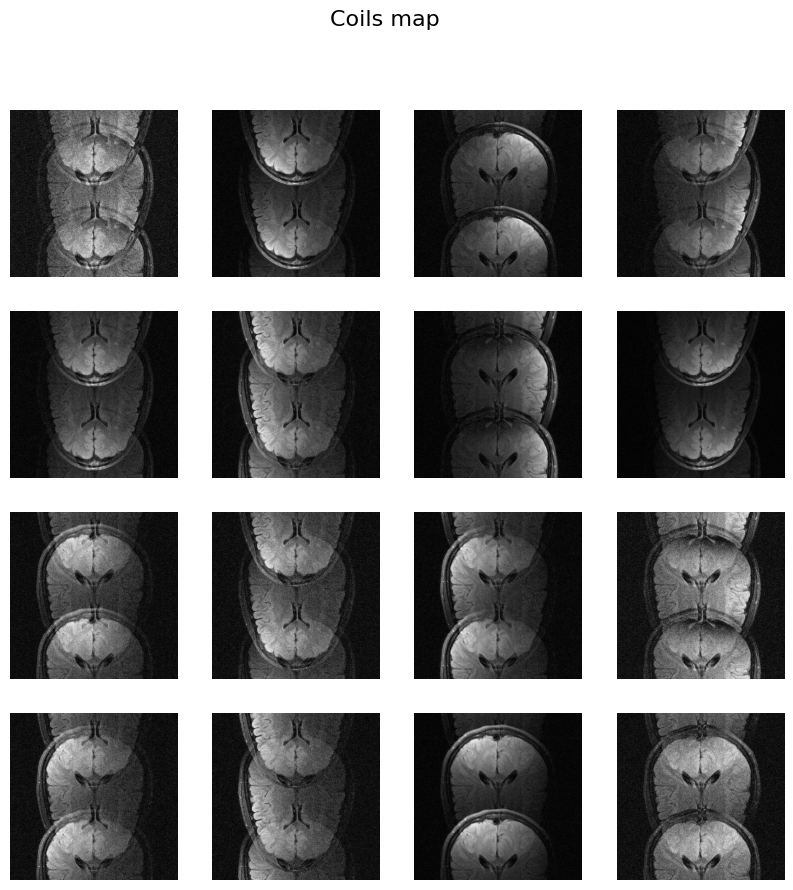

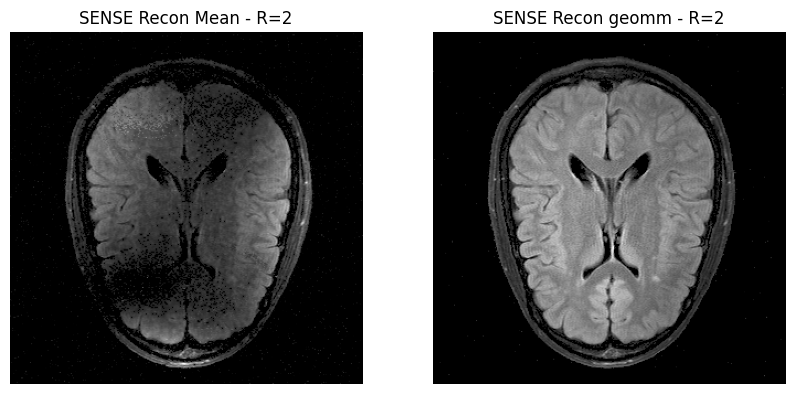

In [12]:
# ====== YOUR CODE: ======
show_grid ( np.abs(img_R2), cmap='gray', title='Coils map')
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(np.abs(recon_SENSE_avg_2), cmap='gray'), plt.title(f'SENSE Recon Mean - R={R}'), plt.axis('off')
plt.subplot(122), plt.imshow(np.abs(recon_SENSE_geom_2), cmap='gray'), plt.title(f'SENSE Recon geomm - R={R}'), plt.axis('off')
plt.show()
# ========================